# Presenting experimental results

## link : https://bit.ly/3RaKC4A

When you undertake an experiment you are typically gathering observations from a process which is often unknowable. In such a case we are looking for models which explain the observations.

Let us say, for example that we want to know how long it takes for a kettle to boil from cold. The simplest approach would be to boil the kettle and report our results. We want to make sure the results are repeatable so we construct the following experiment

1. Kettle with exactly 1 litre of water at $20^\circ C$ and then time how long it takes to switch off after the kettle is switched on. Report the time in seconds

In [1]:
#### This block is simply supporting code.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from numpy import random


kettle1 = pd.read_csv('https://raw.githubusercontent.com/cap508/PythonNotebooks/main/Quant/data1.csv', header=None).values
kettle1 = kettle1[:,0]

def runExperiment(ExperimentalData, num):
    x = random.choice(ExperimentalData, num, replace = False)
    return x

ParserError: ignored

In [ ]:
#### Run an experiment and report the result


time = runExperiment(kettle1, 1) # (experiment to run, number of runs)
print(f"Time to boil a kettle is : {time} seconds")

### Questions

1. What is wrong with this statement?
2. If you saw this written in an academic paper as the result of an experiment what might you feedback?

## Descriptive statistics

Because we recognise that the world is stochastic we might decide to run the experiment many times
(maybe we read somewhere that this was a good number). We then report the average of the times we recorded.

2. Repeat the boiling experiment 30 times allowing the kettle to cooldown to room temperature between runs.

In [ ]:
times = runExperiment(kettle1, 30)

print(times)
print(f"The average time taken to boil the kettle was {np.mean(times)} seconds")

[165.22542364 189.26263205 130.07025515 151.08165672 176.91503038
 152.58988968 144.21261819 160.41195471 153.58771149 169.80131087
 161.71041444 142.14800648 138.77826126 175.1363953  172.28255404
 228.85803643 160.62186277 155.23140235 155.82915422 165.34032626
 124.35850668 148.10029354 158.82581424 150.30297818 160.79495656
 165.41675559 152.96245022 140.56406115 187.60357925 183.10541735]
The average time taken to boil the kettle was 160.70432363970122 seconds


### Questions

1. Is Mean the best measure of centrality, when might you choose something else?
2. When would the 'spread' of values returned we important?

# Variation

So we realise we can measure the amount of variation of values and this might be useful to report so we choose to report the standard deviation.

In [ ]:
sd = np.std(times)

print("The standard deviation associated with the time to boil a kettle is {:.2f} seconds".format(sd))

The standard deviation associated with the time to boil a kettle is 19.83 seconds


### Standard Deviation

Sandard deviation tells us how spread the numbers are. Commonly it is stated that 68% of all values will fall within on standard deviation and 95% of all values will fall within 2 standard deviations.

![title](https://cdn.scribbr.com/wp-content/uploads/2020/09/standard-deviation-in-normal-distributions.png)

image from : https://www.scribbr.com/statistics/standard-deviation/

In [ ]:
# Is this true for our kettle?

experimentSize = 10000 # maximum allowable = 10,000
mul = 1

times = runExperiment(kettle1, experimentSize)

lower = np.mean(times)-mul*np.std(times)
upper = np.mean(times)+mul*np.std(times)
print("Mean, {:.2f}, Std {:.2f}, M-1SD {:.2f}, M+1SD {:.2f}".format(np.mean(times), np.std(times), lower, upper))

count = np.sum(times < lower) + np.sum(time>upper)
print(f"Number outside limit {count}")

print("Percentage {:.2f}".format((1- (count/experimentSize))*100))

Mean, 165.14, Std 19.96, M-1SD 145.18, M+1SD 185.10
Number outside limit 1576
Percentage 84.24


### Question

1. Do you think that our experimental data is normal?
2. Do you think that our generating process (i.e. ground truth) is normal?

In [ ]:
# Let's retry with a normal distribution.

# dataSize is the number of samples in an experiment
dataSize = 1000
trueMean = 0.0
trueScale = 2.0
confidence = 95
mul=1
data = np.random.normal(loc=trueMean, scale = trueScale, size = dataSize)


lower = np.mean(data)-mul*np.std(data)
upper = np.mean(data)+mul*np.std(data)
print("Mean, {:.2f}, Std {:.2f}, M-1SD {:.2f}, M+1SD {:.2f}".format(np.mean(data), np.std(data), lower, upper))

count = np.sum(data < lower) + np.sum(data >upper)
print(f"Number outside limit {count}")

print("Percentage {:.2f}".format((1- (count/dataSize))*100))



Mean, 0.08, Std 2.00, M-1SD -1.93, M+1SD 2.08
Number outside limit 313
Percentage 68.70


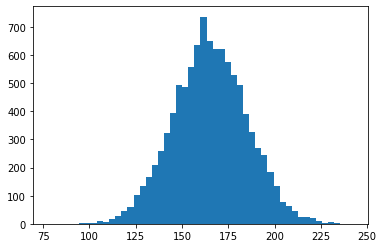

In [ ]:
# Remember we can visualise our data to 'eyeball' the distribution

plt.hist(times, bins = 50)
plt.show()

## Confidence Intervals

Closely linked to standard deviation is the concept of confidence intervals.

A confidence interval is typically associated with the calculation of the mean and is best thought of as follows:

If I consider a 95% confidence interval then were I to run this experiment again and again then in 95% of tries I would expect the true mean to fall within the confidence interval.

In [ ]:
# a simple function to return a mean an confidence interval for a dataset
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), stats.sem(a)
    h = se * stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

# Let's run our initial experiment to caculate a mean and a confidence interval
# we will use a normally distributed set of data

# dataSize is the number of samples in an experiment
dataSize = 30
trueMean = 0.0
trueScale = 2.0
confidence = 95
data = np.random.normal(loc=trueMean, scale = trueScale, size = dataSize)

ret = mean_confidence_interval(data, confidence/100)
print(ret)




# now let's check this by runnin the experiment a number of times?

experimentCount = 100
count = 0
for i in range(experimentCount):
    data = np.random.normal(loc=trueMean, scale = trueScale, size = dataSize)
    ret = mean_confidence_interval(data, confidence/100)
    # Report if the mean is outside of the range we expected.
    if trueMean < ret[1]:
        count = count +1
    if trueMean > ret[2]:
        count = count+1

print (f"Count {count}/{experimentCount} : compared to {100-confidence}/100")


(-0.507590658243105, -1.1833713794713918, 0.1681900629851819)
Count 5/100 : compared to 5/100


## TRY :
1. Running the cell above to see how consistent the results are
2. Changing the confidence interval, dataSize and experiment count to see what the effect is
3. Changing the parameters of the normal distribution you are estimating

## Experimental result or noise

When we come up with a new methods, approach, treatment, etc. we support the claim that our work was responsible for the effects seem. However because the values vary due to stochastic effects it's not simpe to say that the difference wasn't just due to luck.

Let's start with an example where we have two experiments the first "treat1" is the benchmark. The second uses a new method we have proposed.

In [ ]:
# Let's start by getting the full data sets

treat1 = pd.read_csv('https://www-users.cs.york.ac.uk/cap508/resources/I2RQuant/treat1.csv', header=None).values
treat1 = treat1[:,0]


treat2 = pd.read_csv('https://www-users.cs.york.ac.uk/cap508/resources/I2RQuant/treat2.csv', header=None).values
treat2 = treat2[:,0]

# then create an exeriment

experimentSize = 10

exp1 = runExperiment(treat1, experimentSize)
exp2 = runExperiment(treat2, experimentSize)


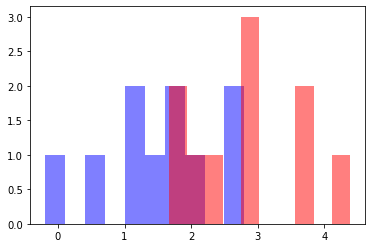

In [ ]:
# now let's visualize our data

plt.hist(exp1, alpha=0.5, color='blue')
plt.hist(exp2, alpha=0.5, color='red')
plt.show()

## Question

1. Do you believe there is a difference in the data and why?
2. If you run the experiements again do you change your mind?
3. does increasing the experimentSize change your opinion?
4. Do you think the data is normally distributed

## A test for normality

The shapiro-wilk is a way of assessing if a sample is normally distributed. We use hypothesis testing and set a null hypothesis

H0 : the data is normally distributed

If the test returns a p-value of less than $\alpha$ then we reject the null hypothesis, It is common to set $\alpha=0.5$ but this significance level can be varied depending on the field of study.



In [ ]:
w, pvalue = stats.shapiro(exp1)
print(f"The returned p-value is {pvalue}")

if (pvalue > 0.05):
    print("The test indicates that the data is likely to be normally distributed")
else:
    print("The test indicates that the data is NOT likely to be normally distributed")

The returned p-value is 0.9354702234268188
The test indicates that the data is likely to be normally distributed


In [ ]:
data = random.poisson(5, 100)
w, pvalue = stats.shapiro(data)
print(f"The returned p-value is {pvalue}")

if (pvalue > 0.05):
    print("The test indicates that the data is likely to be normally distributed")
else:
    print("The test indicates that the data is NOT likely to be normally distributed")

The returned p-value is 0.009279592894017696
The test indicates that the data is NOT likely to be normally distributed


## T-Tests : checking is the difference is significant.

A single sample t-test is used to check if the measure of interest is different to a known value.

A two-sample t-test is use to compare two sets of results



In [ ]:
# Let's check if the mean of treatment 2 'significantly' different to 1.2

# This line of code gives a p-value for a numm hypothesis that the mean is equal to 1.2

experimentSize = 100

exp1 = runExperiment(treat1, experimentSize)
exp2 = runExperiment(treat2, experimentSize)

stats.ttest_1samp(exp1, popmean=1.2)

Ttest_1sampResult(statistic=3.720734640104568, pvalue=0.00032979896558301395)

## Question :

I will tell you that the 'true' mean of the generator for exp1 is 1.5.

1. how many samples do you need from experiments to reliably get a p-value of less than 0.05 for the above question?
2. How many if we want to show that with $\alpha=0.5$ that the mean is not 1.4

Play with the code in the next cell

In [ ]:
experimentSize = 10
exp1 = runExperiment(treat1, experimentSize)
stats.ttest_1samp(exp1, popmean=1.2)

Ttest_1sampResult(statistic=0.7290906377285055, pvalue=0.4844862931818925)

In [ ]:
# We can also provide a parameter to the function to ask if the answer is not only different but greater or less than a known value

stat, p = stats.ttest_1samp(exp1, popmean=1.2, alternative='greater') # alternative='less'

print(f"p-value : {p}")

p-value : 0.30405872416728635


# Two-sample test

## Now we are ready to compare two experiments.

 let's ask the question if our method (as evaluated in experiment 2) is 'better' than the
 baseline (as evaluated in experiment 1). In this case better means the mean is higher.


The test I demonstrate here assumes that the sets are normally distributed and have the same variance.

We can calculate the variance of each as : 1.3350050680600516, 1.2220784840962053
p-value result : 0.06450484755683118


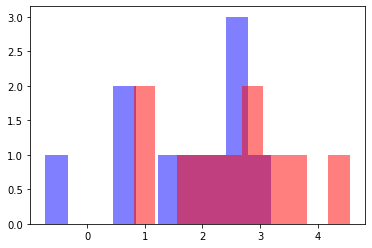

In [ ]:
# first test if the two groups have the 'same' variance
# https://www.geeksforgeeks.org/how-to-conduct-a-two-sample-t-test-in-python/
# https://www.jmp.com/en_gb/statistics-knowledge-portal/t-test/two-sample-t-test.html
# https://www.bmj.com/about-bmj/resources-readers/publications/statistics-square-one/7-t-tests

experimentSize = 10
exp1 = runExperiment(treat1, experimentSize)
exp2 = runExperiment(treat2, experimentSize)



print(f"We can calculate the variance of each as : {np.var(exp1)}, {np.var(exp2)}")
# Note these are 'close enough'!

# Note that greater means that a > b is our alternative hypothesis
w, p = stats.ttest_ind(a=exp2, b=exp1, equal_var=True, alternative='greater')

print(f"p-value result : {p}")

plt.hist(exp1, alpha=0.5, color='blue')
plt.hist(exp2, alpha=0.5, color='red')
plt.show()

# Non-Normal Distributions

Sometimes it is really easy to see that data is non-normal just by looking at it.

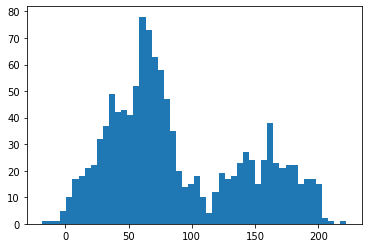

In [ ]:
data = pd.read_csv('https://www-users.cs.york.ac.uk/cap508/resources/I2RQuant/strangeData.csv', header=None).values

plt.hist(data, bins=50)
plt.show()

But if we can't get lots of data it becomes harder

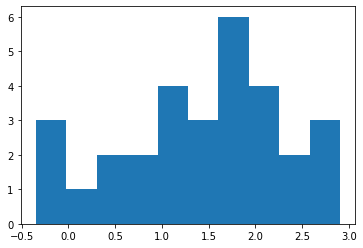

In [ ]:
experimentSize = 30
expData = runExperiment(treat1, experimentSize)

plt.hist(expData)
plt.show()

So let's look at some tests applied to less obviously non-normal data

In [ ]:
# Let's start by getting the full data sets

treat3 = pd.read_csv('https://www-users.cs.york.ac.uk/cap508/resources/I2RQuant/treat3.csv', header=None).values
treat3 = treat3[:,0]

treat4 = pd.read_csv('https://www-users.cs.york.ac.uk/cap508/resources/I2RQuant/treat4.csv', header=None).values
treat4 = treat4[:,0]

treat5 = pd.read_csv('https://www-users.cs.york.ac.uk/cap508/resources/I2RQuant/treat5.csv', header=None).values
treat5 = treat5[:,0]

treat6 = pd.read_csv('https://www-users.cs.york.ac.uk/cap508/resources/I2RQuant/treat6.csv', header=None).values
treat6 = treat6[:,0]


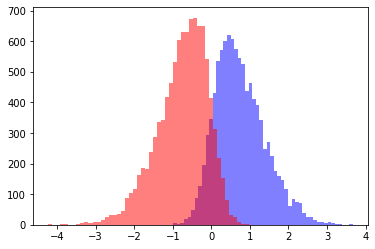

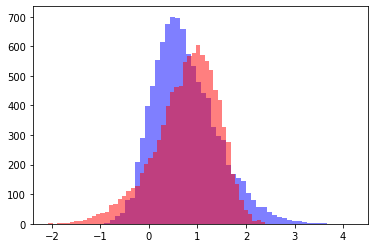

In [ ]:
# Visualise

plt.hist(treat3, color='blue', alpha=0.5, bins=50)
plt.hist(treat4, color='red', alpha=0.5, bins=50)
plt.show()

plt.hist(treat5, color='blue', alpha=0.5, bins=50)
plt.hist(treat6, color='red', alpha=0.5, bins=50)
plt.show()

# Try:

1. Running test for normally on the data sets
2. What is the standard distribution for each set, and what does it mean for these distributions
3. Apply t-tests to test for differences in the sets. What do the results tell you?

In [ ]:
 #Enter your code here

experimentSize = 10
expData1 = runExperiment(treat1, experimentSize)
expData1 = runExperiment(treat2, experimentSize)



# Non-Parametric

Many of the data sets you come across will be non-parametric, meaning that there is not a model for the data that can be characterised using a fixed number of parameters. Under such circumstances using the tests outlined above are at best misleading and at worst wrong.

Don't worry however, for every paramteric test there is a non-parametric equivalent.

Here is a very short video that shows some of the alternatives:

https://www.youtube.com/watch?v=biXY84hDX5M

Instead of the t-test one can use the Mann-Whitney U test to look for significant difference in non-paramteric data.

In [ ]:
# Let's start by looking at treatments 3 & 4
from scipy.stats import mannwhitneyu

# Note that the analysis increases in complexity rapidly for large sample sizes
experimentSize = 10
expData1 = runExperiment(treat3, experimentSize)
expData2 = runExperiment(treat4, experimentSize)


U1, p = mannwhitneyu(expData1, expData2, method="exact")
print(f"The p-value reported is {p}")



The p-value reported is 0.00012990105869362836


In [ ]:
# A nice example of the mann whitney u test is available at.
# https://www.reneshbedre.com/blog/mann-whitney-u-test.html
# The following cells are based on use the code coded at that site


import pandas as pd
df = pd.read_csv("https://reneshbedre.github.io/assets/posts/mann_whitney/genotype.csv")

In [ ]:
# get summary statistics
df.agg(["count", "min", "max", "median", "mean", "skew"])

,A,B
count,23.000000,23.000000
min,20.000000,10.000000
max,60.000000,32.000000
median,56.000000,28.000000
mean,47.695652,25.217391
skew,-0.710884,-1.270302


In [ ]:
df.head(10)

,A,B
0,60,29
1,30,25
2,60,25
3,60,30
4,30,25
5,45,25
6,45,20
7,56,30
8,56,10
9,56,10


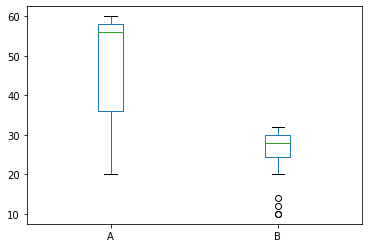

In [ ]:
# generate boxplot to visualize the  data
import matplotlib.pyplot as plt
df.boxplot(column=['A', 'B'], grid=False)
plt.show()

In [ ]:
 w, pvalue = stats.shapiro(df['A'])
print(f"p-value for set A {pvalue}. Less than 0.05 indicated not normal") # p-value < 0.05 == not normal

w, pvalue = stats.shapiro(df['B'])
print(f"p-value for set B {pvalue}. Less than 0.05 indicated not normal") # p-value < 0.05 == not normal


p-value for set A 0.0009495539125055075. Less than 0.05 indicated not normal
p-value for set B 0.00031481595942750573. Less than 0.05 indicated not normal


In [ ]:
# perform two-sided test. You can use 'greater' or 'less' for one-sided test
stat, p = stats.mannwhitneyu(x=df['A'], y=df['B'], alternative = 'two-sided')

print(f"They different if {p} < 0.05")

They different if 7.004695394561307e-07 < 0.05


In [ ]:
w,p = stats.mannwhitneyu(x=df['A'], y=df['B'], alternative = 'greater')

print(f"A is greater than B if {p} < 0.05")

A is greater than B if 3.5023476972806534e-07 < 0.05


# Take away messages

1. Just because there is difference in data doesn't mean your test worked.
2. It is easy to apply statistical tests and get values but it is important to understand what they actually mean.
3. Not all data is normally distributed so don't think you can always apply normal tests.
4. You will have to understand and defend your conclusions, make sure you understand your data and your analysis.

### Further Reading

Little Inference Book
https://leanpub.com/LittleInferenceBook


Non-parametric statistics a step-by-step approach
https://faculty.ksu.edu.sa/sites/default/files/nonparametric_statistics_a_step-by-step_approach.pdf

Understanding statistics and experimental design
https://link.springer.com/book/10.1007/978-3-030-03499-3
